# **Project 1: Applied Statistics**

**Domain**: Sports

**Context**: Company X manages the men's top professional basketball division of the American league system. The dataset contains information
on all the teams that have participated in all the past tournaments. It has data about how many baskets each team scored, conceded, how many
times they came within the first 2 positions, how many tournaments they have qualified, their best position in the past, etc.

**Dataset Description**: Basketball.csv - The data set contains information on all the teams so far participated in all the past tournaments.

**Attributes**

 - Team: Team's name

 - Tournament: Number of played tournaments

 - Score: Team's score so far

 - PlayedGames: Games played by the team so far

 - WonGames: Games won by the team so far

 - DrawnGames: Games drawn by the team so far

 - LostGames: Games lost by the team so far

 - BasketScored: Basket scored by the team so far

 - BasketGiven: Basket scored against the team so far

 - TournamentChampion: How many times the team was a champion of the
tournaments so far

 - Runner-up: How many times the team was a runners-up of the tournaments so far

 - TeamLaunch: Year the team was launched on professional basketball

 - HighestPositionHeld: Highest position held by the team amongst all the tournaments played

Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Load the dataset

In [2]:
#Load dataset into Pandas dataframe
data = pd.read_csv('Basketball.csv')
#Display the first 5 rows
data.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [3]:
#Display name and data types of the columns in the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [4]:
#Display statistic metrics of the integer columns
data.describe()

,Tournament,HighestPositionHeld
count,61.000000,61.000000
mean,24.000000,7.081967
std,26.827225,5.276663
min,1.000000,1.000000
25%,4.000000,3.000000
50%,12.000000,6.000000
75%,38.000000,10.000000
max,86.000000,20.000000


In [5]:
data.shape

(61, 13)



*   The dataset has 61 rows and 13 columns
*   Tournament and HighestPositionHeld are the only 2 columns having integer data type
*   There is no null value in the dataset
*   All columns except Team and TeamLaunch contain integer data although the data type is object








## Data Preparation

Since except the Team column, all the others contain numbers, let's convert them to integer data type. But prior to that we need to make modifications to ensure that '-' values are converted to 0 and include only one year in TeamLaunch column

Modify the TeamLaunch column to include only one year

In [6]:
data['TeamLaunch'] = data['TeamLaunch'].apply(lambda yr: yr[:4])

Replace the '-' with 0 across all the columns

In [7]:
data.replace(to_replace = '-', value = 0, inplace=True)

Convert columns to Integer datatype

In [8]:
columns = data.columns
data[columns[1:]] = data[columns[1:]].apply(pd.to_numeric)
data.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     int64 
 3   PlayedGames          61 non-null     int64 
 4   WonGames             61 non-null     int64 
 5   DrawnGames           61 non-null     int64 
 6   LostGames            61 non-null     int64 
 7   BasketScored         61 non-null     int64 
 8   BasketGiven          61 non-null     int64 
 9   TournamentChampion   61 non-null     int64 
 10  Runner-up            61 non-null     int64 
 11  TeamLaunch           61 non-null     int64 
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(12), object(1)
memory usage: 6.3+ KB


In [10]:
data.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,24.000000,901.426230,796.819672,303.967213,188.934426,303.754098,1140.344262,1140.229508,1.426230,1.409836,1958.918033,7.081967
std,26.827225,1134.899121,876.282765,406.991030,201.799477,294.708594,1506.740211,1163.710766,5.472535,4.540107,27.484114,5.276663
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1929.000000,1.000000
25%,4.000000,96.000000,114.000000,34.000000,24.000000,62.000000,153.000000,221.000000,0.000000,0.000000,1935.000000,3.000000
50%,12.000000,375.000000,423.000000,123.000000,95.000000,197.000000,430.000000,632.000000,0.000000,0.000000,1951.000000,6.000000
75%,38.000000,1351.000000,1318.000000,426.000000,330.000000,563.000000,1642.000000,1951.000000,0.000000,0.000000,1978.000000,10.000000
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.000000,25.000000,2017.000000,20.000000


In [11]:
#New column for percentage of games won by team
data['WinPercent'] = data['WonGames']/data['PlayedGames']

In [12]:
#New column for percentage of games lost by team
data['LossPercent'] = data['LostGames']/data['PlayedGames']

In [13]:
#New column to determine how attacking or defensive the team is based on BasketScored and BasketGiven
data['AttackDefence'] = data['BasketScored']/data['BasketGiven']

In [14]:
data.describe()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,WinPercent,LossPercent,AttackDefence
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,60.000000,60.000000,60.000000
mean,24.000000,901.426230,796.819672,303.967213,188.934426,303.754098,1140.344262,1140.229508,1.426230,1.409836,1958.918033,7.081967,0.313648,0.449919,0.804810
std,26.827225,1134.899121,876.282765,406.991030,201.799477,294.708594,1506.740211,1163.710766,5.472535,4.540107,27.484114,5.276663,0.078312,0.084009,0.273057
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1929.000000,1.000000,0.166667,0.203838,0.384615
25%,4.000000,96.000000,114.000000,34.000000,24.000000,62.000000,153.000000,221.000000,0.000000,0.000000,1935.000000,3.000000,0.276075,0.411430,0.659538
50%,12.000000,375.000000,423.000000,123.000000,95.000000,197.000000,430.000000,632.000000,0.000000,0.000000,1951.000000,6.000000,0.304917,0.457271,0.736083
75%,38.000000,1351.000000,1318.000000,426.000000,330.000000,563.000000,1642.000000,1951.000000,0.000000,0.000000,1978.000000,10.000000,0.335402,0.485424,0.834656
max,86.000000,4385.000000,2762.000000,1647.000000,633.000000,1070.000000,5947.000000,3889.000000,33.000000,25.000000,2017.000000,20.000000,0.596307,0.700000,1.894669


## Data Analysis

Univariate Analysis

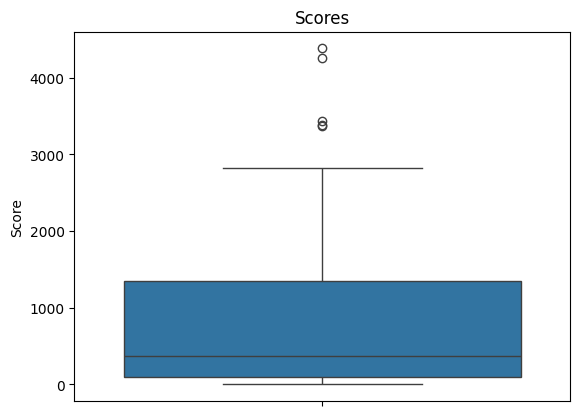

In [15]:
plt.title('Scores')
sns.boxplot(data=data, y = 'Score');

In [16]:
#Outliers in Score
Q1 = data['Score'].quantile(0.25)
Q3 = data['Score'].quantile(0.75)
IQR=Q3-Q1
#Outliers: greater than Q3 + 1.5*Interquartile range or less than Q1 - 1.5*Interquartile range
print('Count of Number of outliers: ' + str(data.loc[data['Score']>(Q3+1.5*IQR)]['Score'].count() + data.loc[data['Score']<(Q1-1.5*IQR)]['Score'].count()))
print('Teams with Scores above the upper fence of outliers: ')
print(data[data['Score']>(Q3+1.5*IQR)]['Team'])
print('Teams with Scores below the lower fence of outliers: ')
print(data[data['Score']<(Q1-1.5*IQR)]['Team'])

Count of Number of outliers: 5
Teams with Scores above the upper fence of outliers: 
0    Team 1
1    Team 2
2    Team 3
3    Team 4
4    Team 5
Name: Team, dtype: object
Teams with Scores below the lower fence of outliers: 
Series([], Name: Team, dtype: object)


Teams 1, 2, 3, 4 and 5 have outperformed the other teams

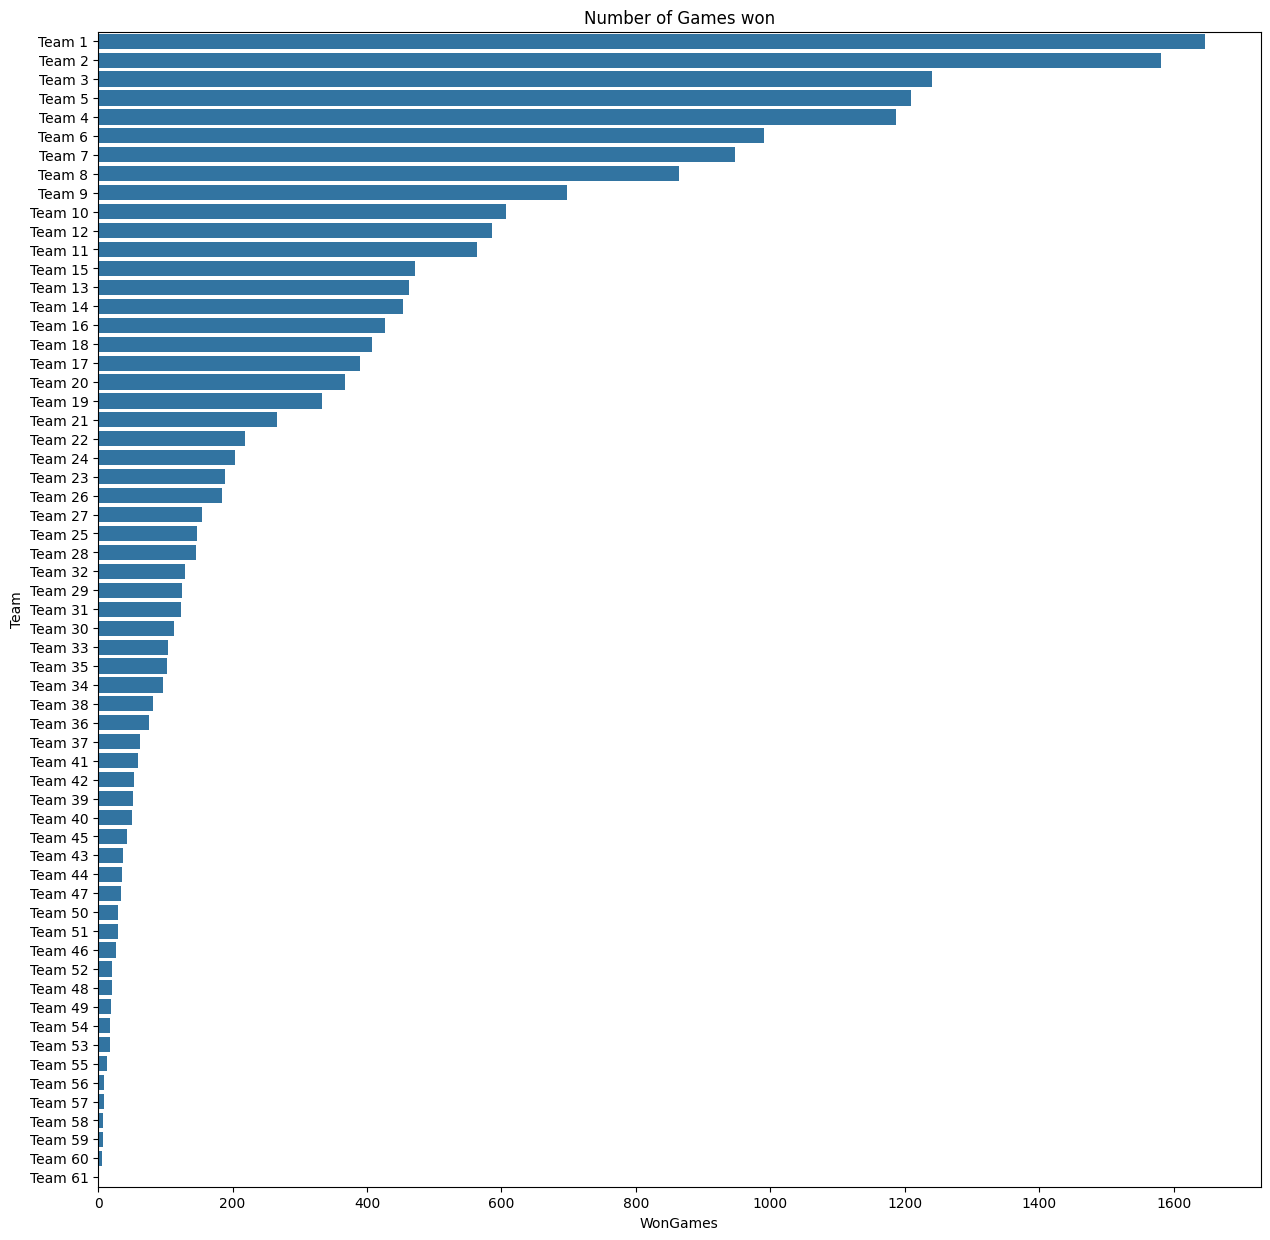

In [17]:
plt.figure(figsize = (15,15))
plt.title('Number of Games won')
df = data[['Team','WonGames']].sort_values(by = 'WonGames', ascending = False)
sns.barplot(x=df['WonGames'], y=df['Team']);

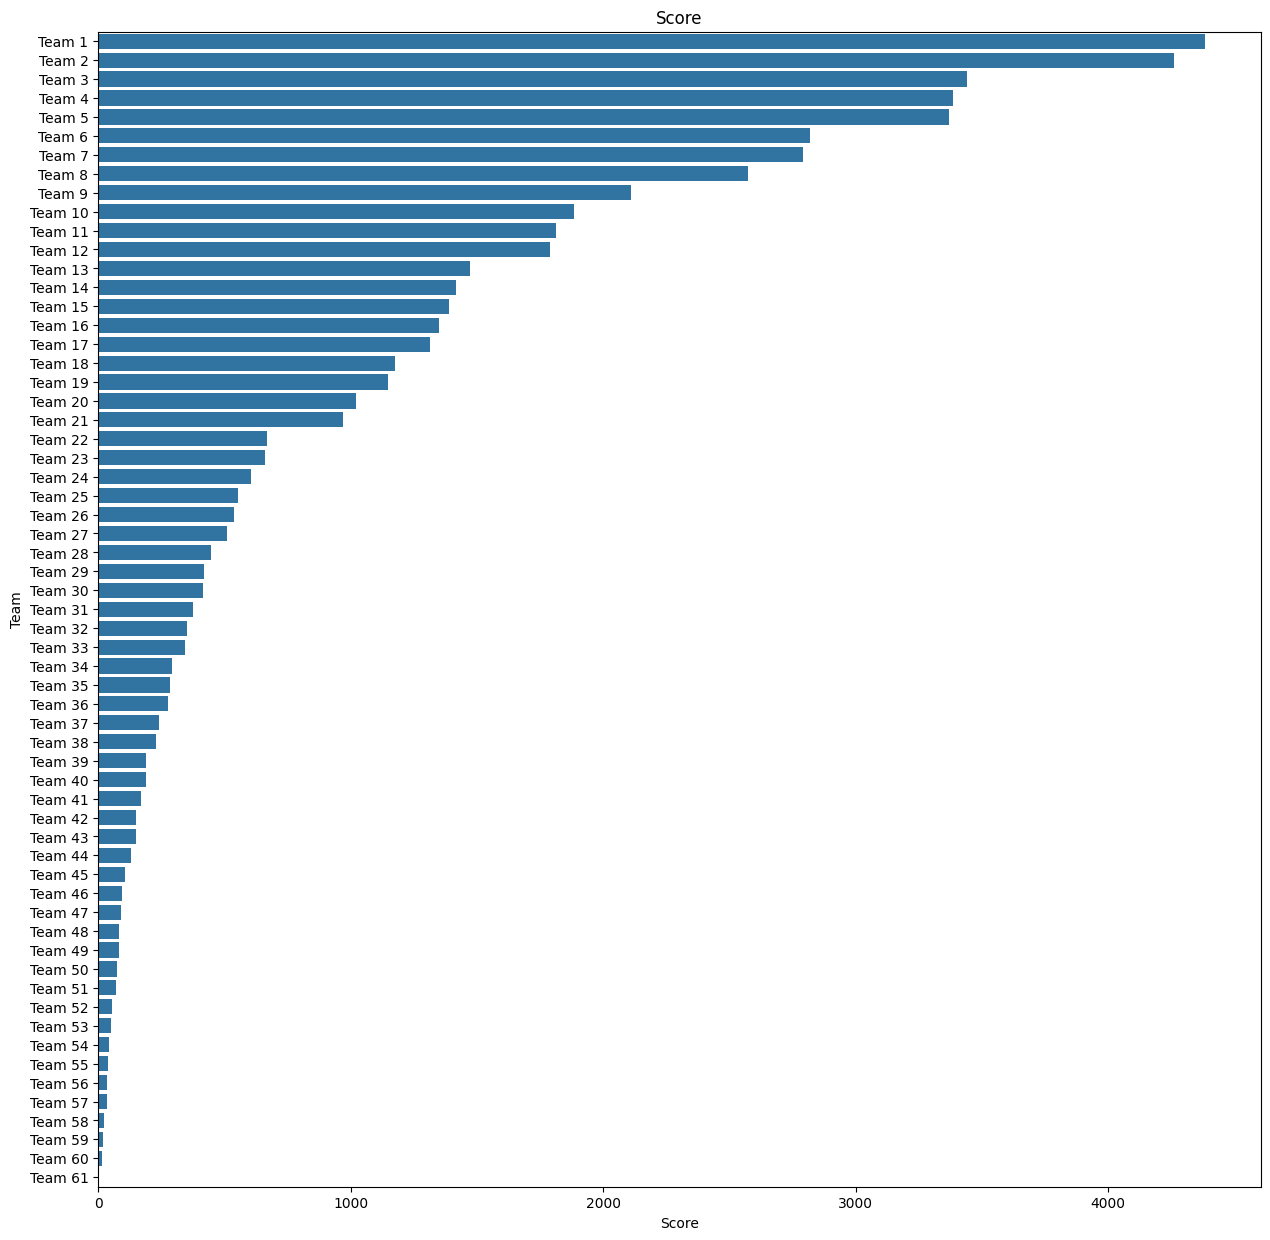

In [18]:
plt.figure(figsize = (15,15))
plt.title('Score')
df = data[['Team','Score']].sort_values(by = 'Score', ascending = False)
sns.barplot(x=df['Score'], y=df['Team']);

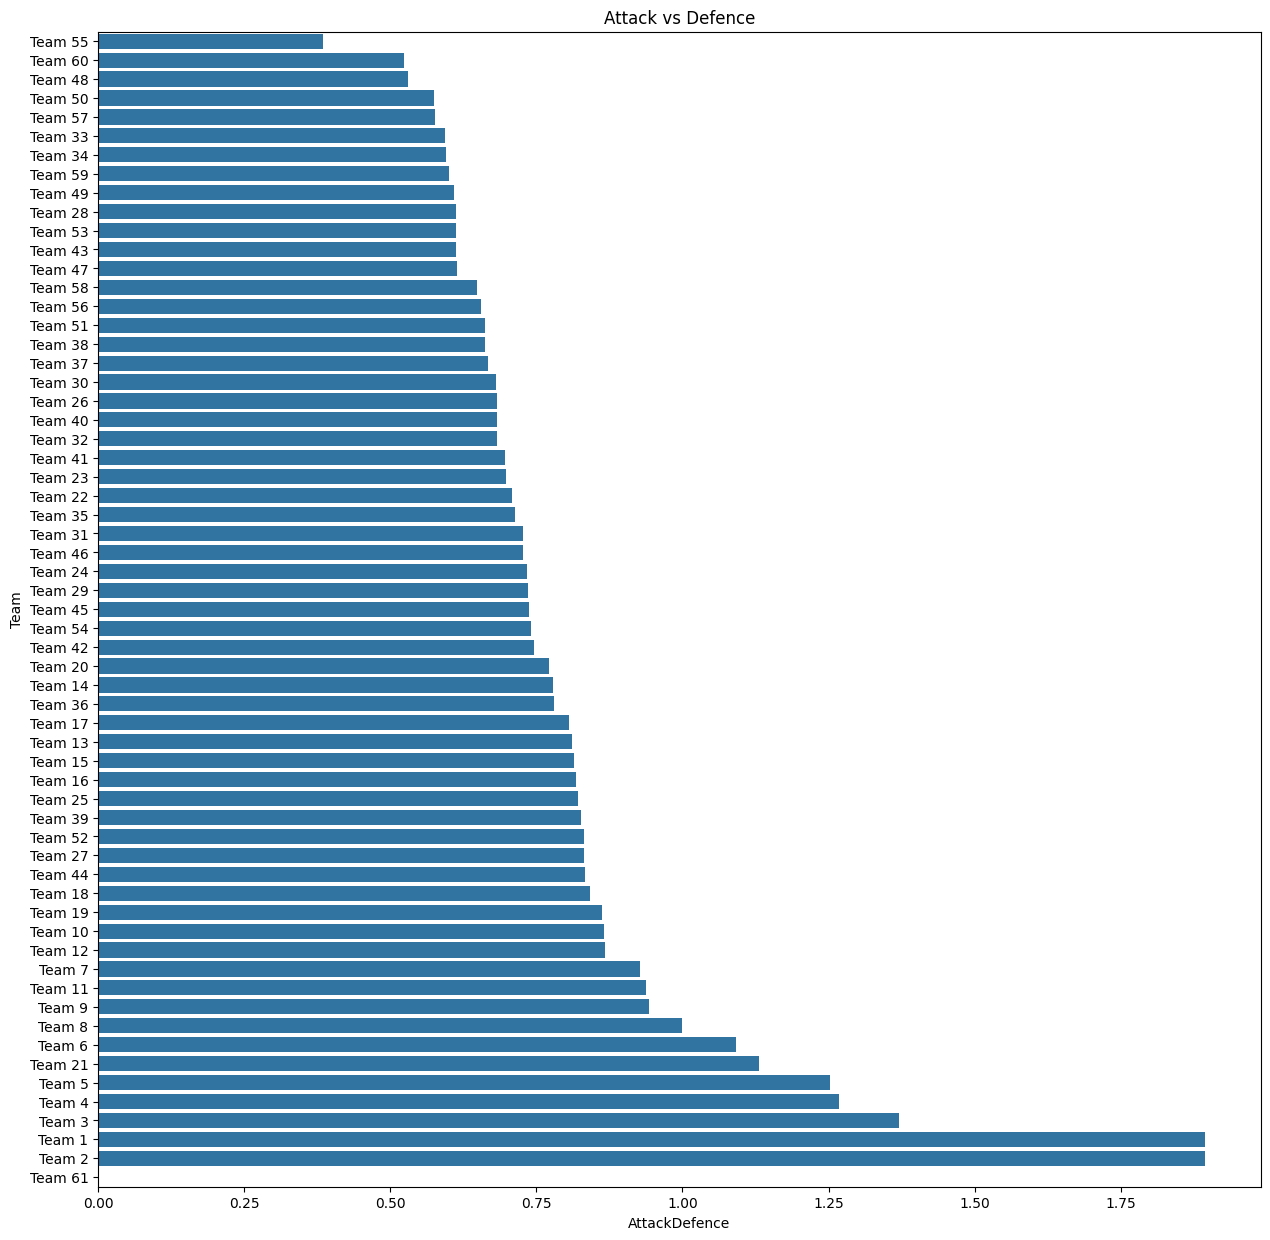

In [19]:
plt.figure(figsize = (15,15))
plt.title('Attack vs Defence')
df = data[['Team','AttackDefence']].sort_values(by = 'AttackDefence', ascending = True)
sns.barplot(x=df['AttackDefence'], y=df['Team']);

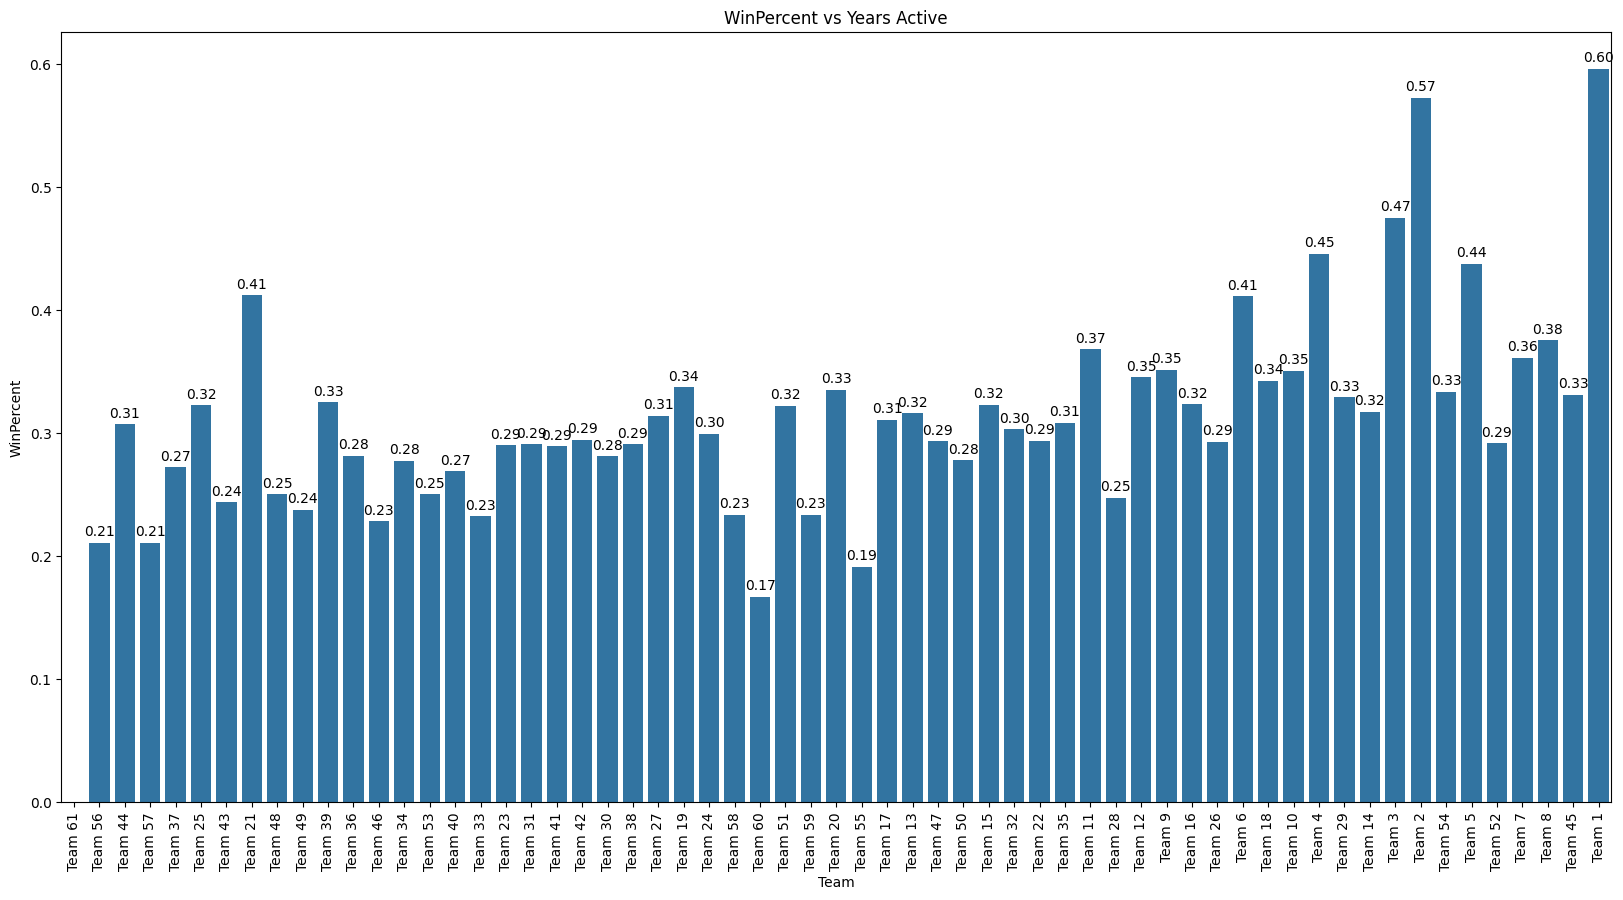

In [20]:
#Plot WinPercent for all teams sorted by TeamLaunch year in descending order
plt.figure(figsize = (20,10))
plt.title('WinPercent vs Years Active')
df = data[['Team','WinPercent','TeamLaunch']].sort_values(by = 'TeamLaunch', ascending = False)
plots = sns.barplot(x=df['Team'], y=df['WinPercent']);
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90)
plt.show()

Team 21 is one of the youngest teams in the Tournament but has won >40% of its matches. Teams 1, 2, 3, 4 and 5 have been around for a long time and still have a winpercent > 40%. Teams 1 and 2 stand out with 60% and 57% respectively. These are the teams to look out for in the future tournaments.

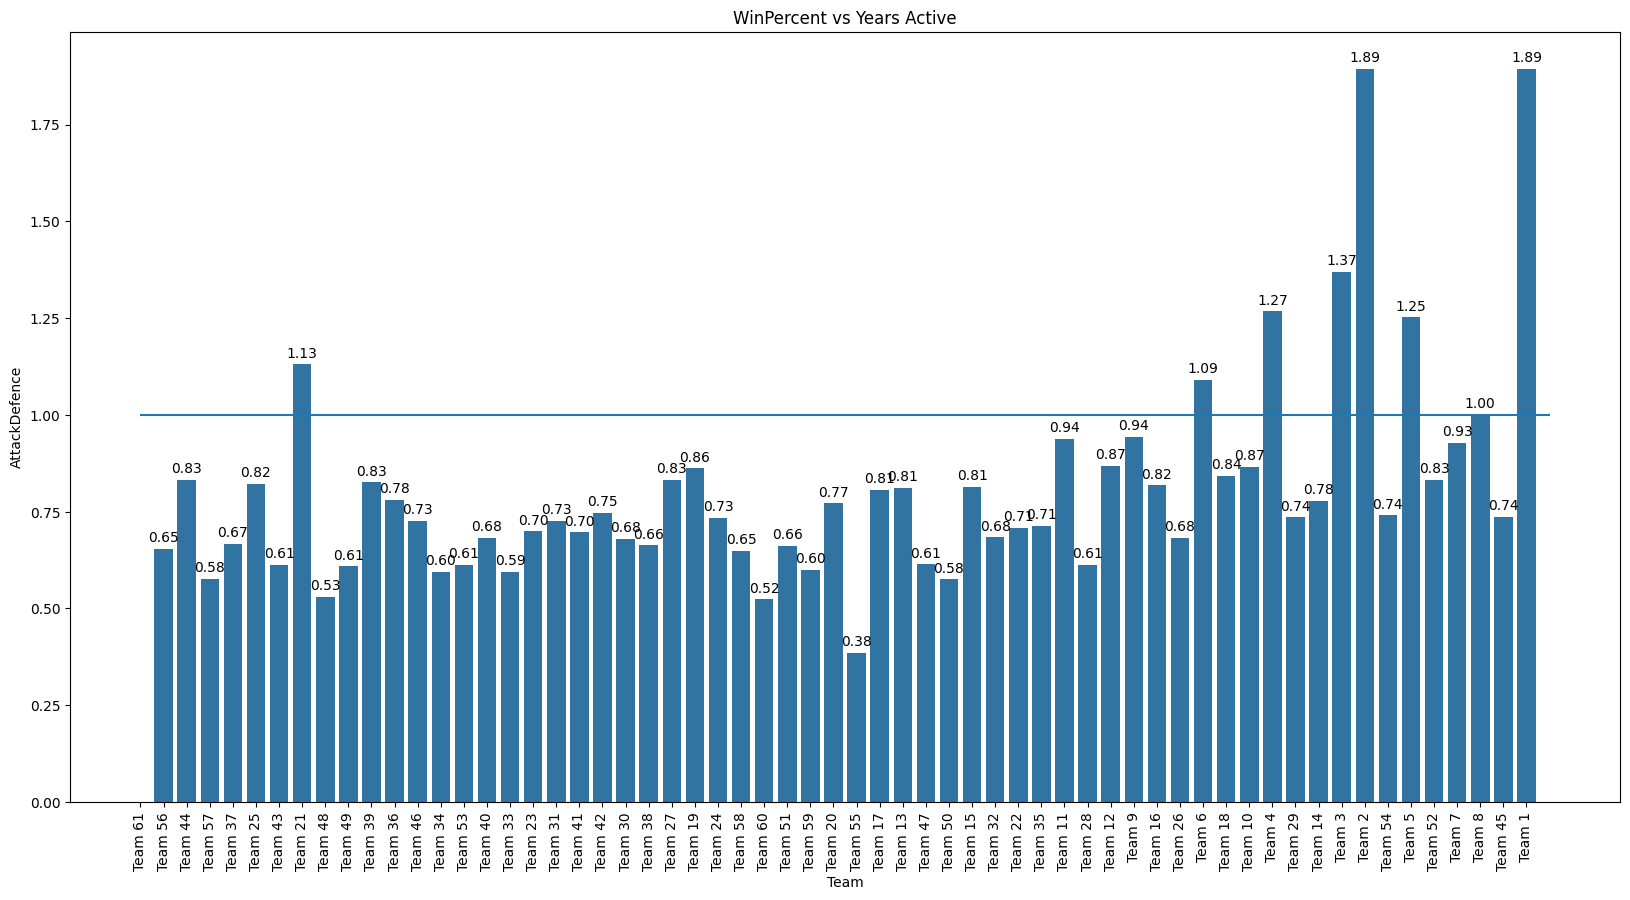

In [21]:
#Plot AttackDefence for all teams sorted by TeamLaunch year indescending order
plt.figure(figsize = (20,10))
plt.title('WinPercent vs Years Active')
df = data[['Team','AttackDefence','TeamLaunch']].sort_values(by = 'TeamLaunch', ascending = False)
plots = sns.barplot(x=df['Team'], y=df['AttackDefence']);
for bar in plots.patches:
  plots.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.xticks(rotation=90)
plt.hlines(1,0,61, linestyles='solid')
plt.show()

Teams 1, 2, 3, 4 and 5 have dominated in the form of a greater number of basekets scored vs baskets given. Teams 8, 6 and 21 have a well rounded attack and defence where the number of baskets scored and given are almost equal. Team 21 being a young team stands out since within a few years they have built a team of well rounded attack and defence.

In [22]:
data.skew()

<ipython-input-22-b3b431164adb>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


Tournament             1.217038
Score                  1.593109
PlayedGames            1.141978
WonGames               1.805728
DrawnGames             1.004159
LostGames              0.897130
BasketScored           1.777436
BasketGiven            0.975859
TournamentChampion     4.777021
Runner-up              4.360643
TeamLaunch             0.672956
HighestPositionHeld    0.817976
WinPercent             1.440046
LossPercent           -0.268561
AttackDefence          2.406538
dtype: float64

All the attributes seem to be Right skewed except the LossPercent

<ipython-input-23-741f6724af78>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Score'])


<Axes: xlabel='Score', ylabel='Density'>

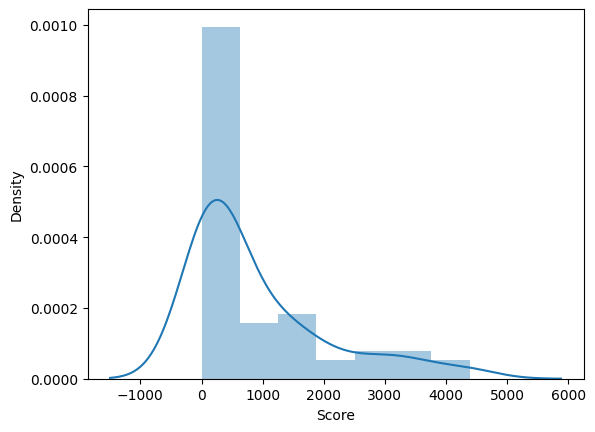

In [23]:
sns.distplot(data['Score'])

<ipython-input-24-ee321d21b4c7>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['PlayedGames'])


<Axes: xlabel='PlayedGames', ylabel='Density'>

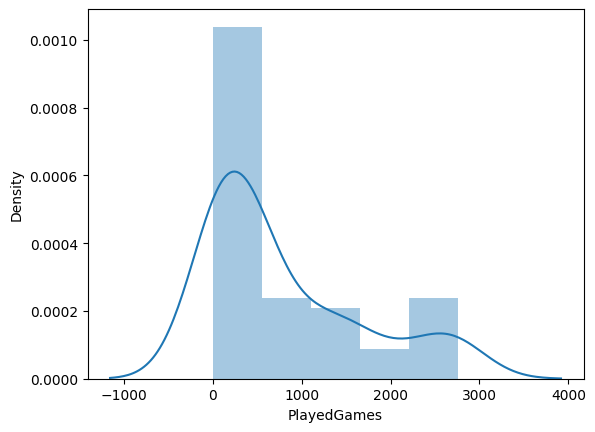

In [24]:
sns.distplot(data['PlayedGames'])

<ipython-input-25-eff727651606>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['BasketScored'])


<Axes: xlabel='BasketScored', ylabel='Density'>

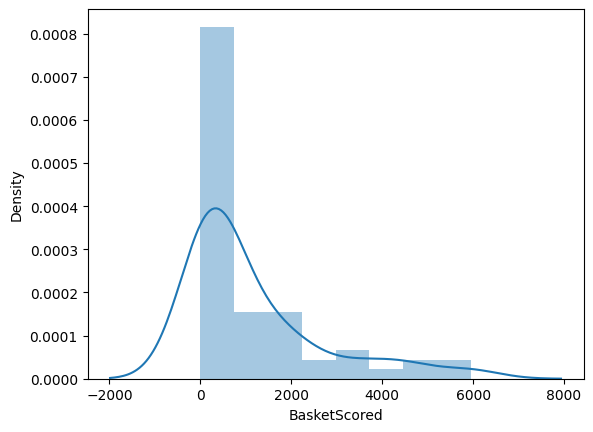

In [25]:
sns.distplot(data['BasketScored'])

Bivariate Analysis

In [26]:
data[['Score', 'WonGames', 'DrawnGames', 'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion', 'Runner-up', 'TeamLaunch', 'HighestPositionHeld', 'WinPercent', 'LossPercent', 'AttackDefence']].corr()

,Score,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,WinPercent,LossPercent,AttackDefence
Score,1.000000,0.997240,0.958452,0.880040,0.996656,0.944263,0.714280,0.764278,-0.543432,-0.669775,0.877385,-0.809566,0.890528
WonGames,0.997240,1.000000,0.939844,0.852785,0.999318,0.926234,0.752204,0.797350,-0.543854,-0.648628,0.884278,-0.802821,0.902893
DrawnGames,0.958452,0.939844,1.000000,0.973156,0.942668,0.992579,0.503472,0.566269,-0.577616,-0.719845,0.774416,-0.757461,0.757930
LostGames,0.880040,0.852785,0.973156,1.000000,0.859169,0.985275,0.325462,0.393211,-0.600513,-0.725149,0.665366,-0.655055,0.615386
BasketScored,0.996656,0.999318,0.942668,0.859169,1.000000,0.931548,0.743144,0.790532,-0.553453,-0.649455,0.879124,-0.795043,0.897178
BasketGiven,0.944263,0.926234,0.992579,0.985275,0.931548,1.000000,0.471824,0.533814,-0.615715,-0.726610,0.757279,-0.717092,0.724377
TournamentChampion,0.714280,0.752204,0.503472,0.325462,0.743144,0.471824,1.000000,0.971552,-0.284878,-0.305397,0.765351,-0.638581,0.856027
Runner-up,0.764278,0.797350,0.566269,0.393211,0.790532,0.533814,0.971552,1.000000,-0.315881,-0.360408,0.801247,-0.677121,0.889180
TeamLaunch,-0.543432,-0.543854,-0.577616,-0.600513,-0.553453,-0.615715,-0.284878,-0.315881,1.000000,0.588914,-0.491259,0.201751,-0.381367
HighestPositionHeld,-0.669775,-0.648628,-0.719845,-0.725149,-0.649455,-0.726610,-0.305397,-0.360408,0.588914,1.000000,-0.737288,0.661382,-0.621877


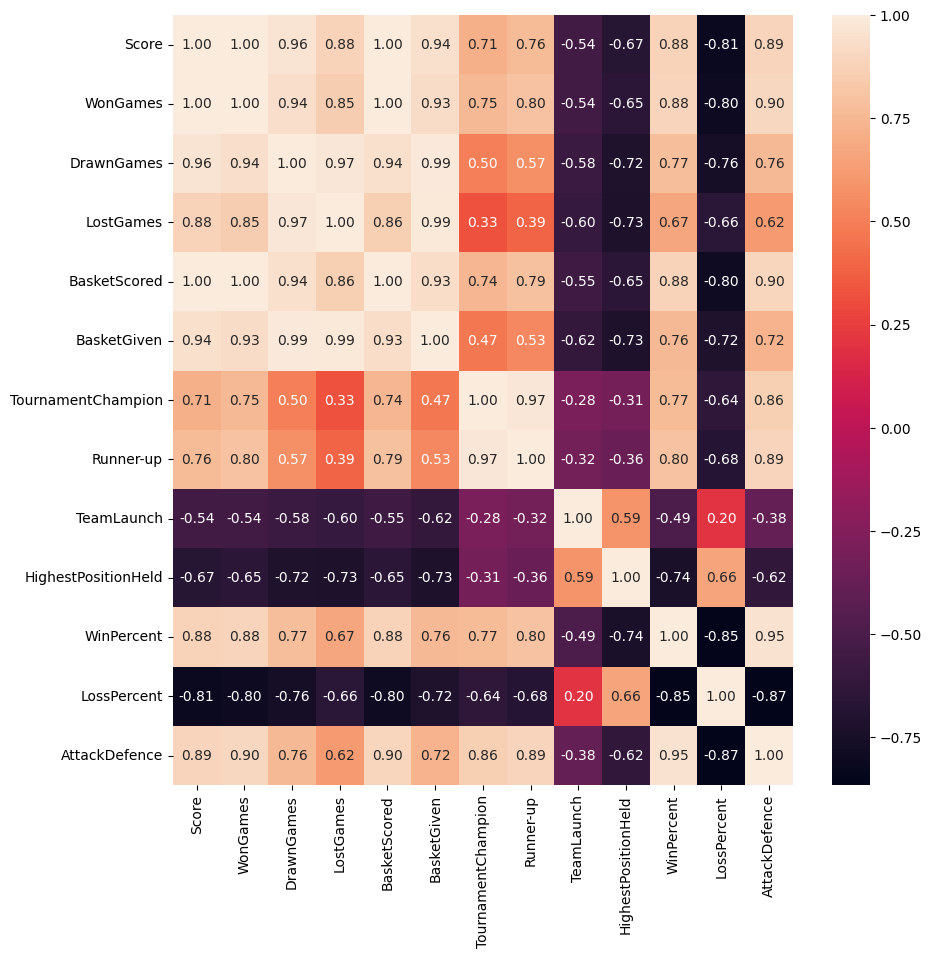

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[['Score', 'WonGames', 'DrawnGames', 'LostGames', 'BasketScored', 'BasketGiven', 'TournamentChampion', 'Runner-up', 'TeamLaunch', 'HighestPositionHeld', 'WinPercent', 'LossPercent', 'AttackDefence']].corr(), ax=ax, annot = True, fmt='.2f');

There is very high correlation between AttackDefence, WinPercent and Score. So, those teams which have a very good attack and have scored more baskets than basket given, have had a high overall score.

Multivariate Analysis

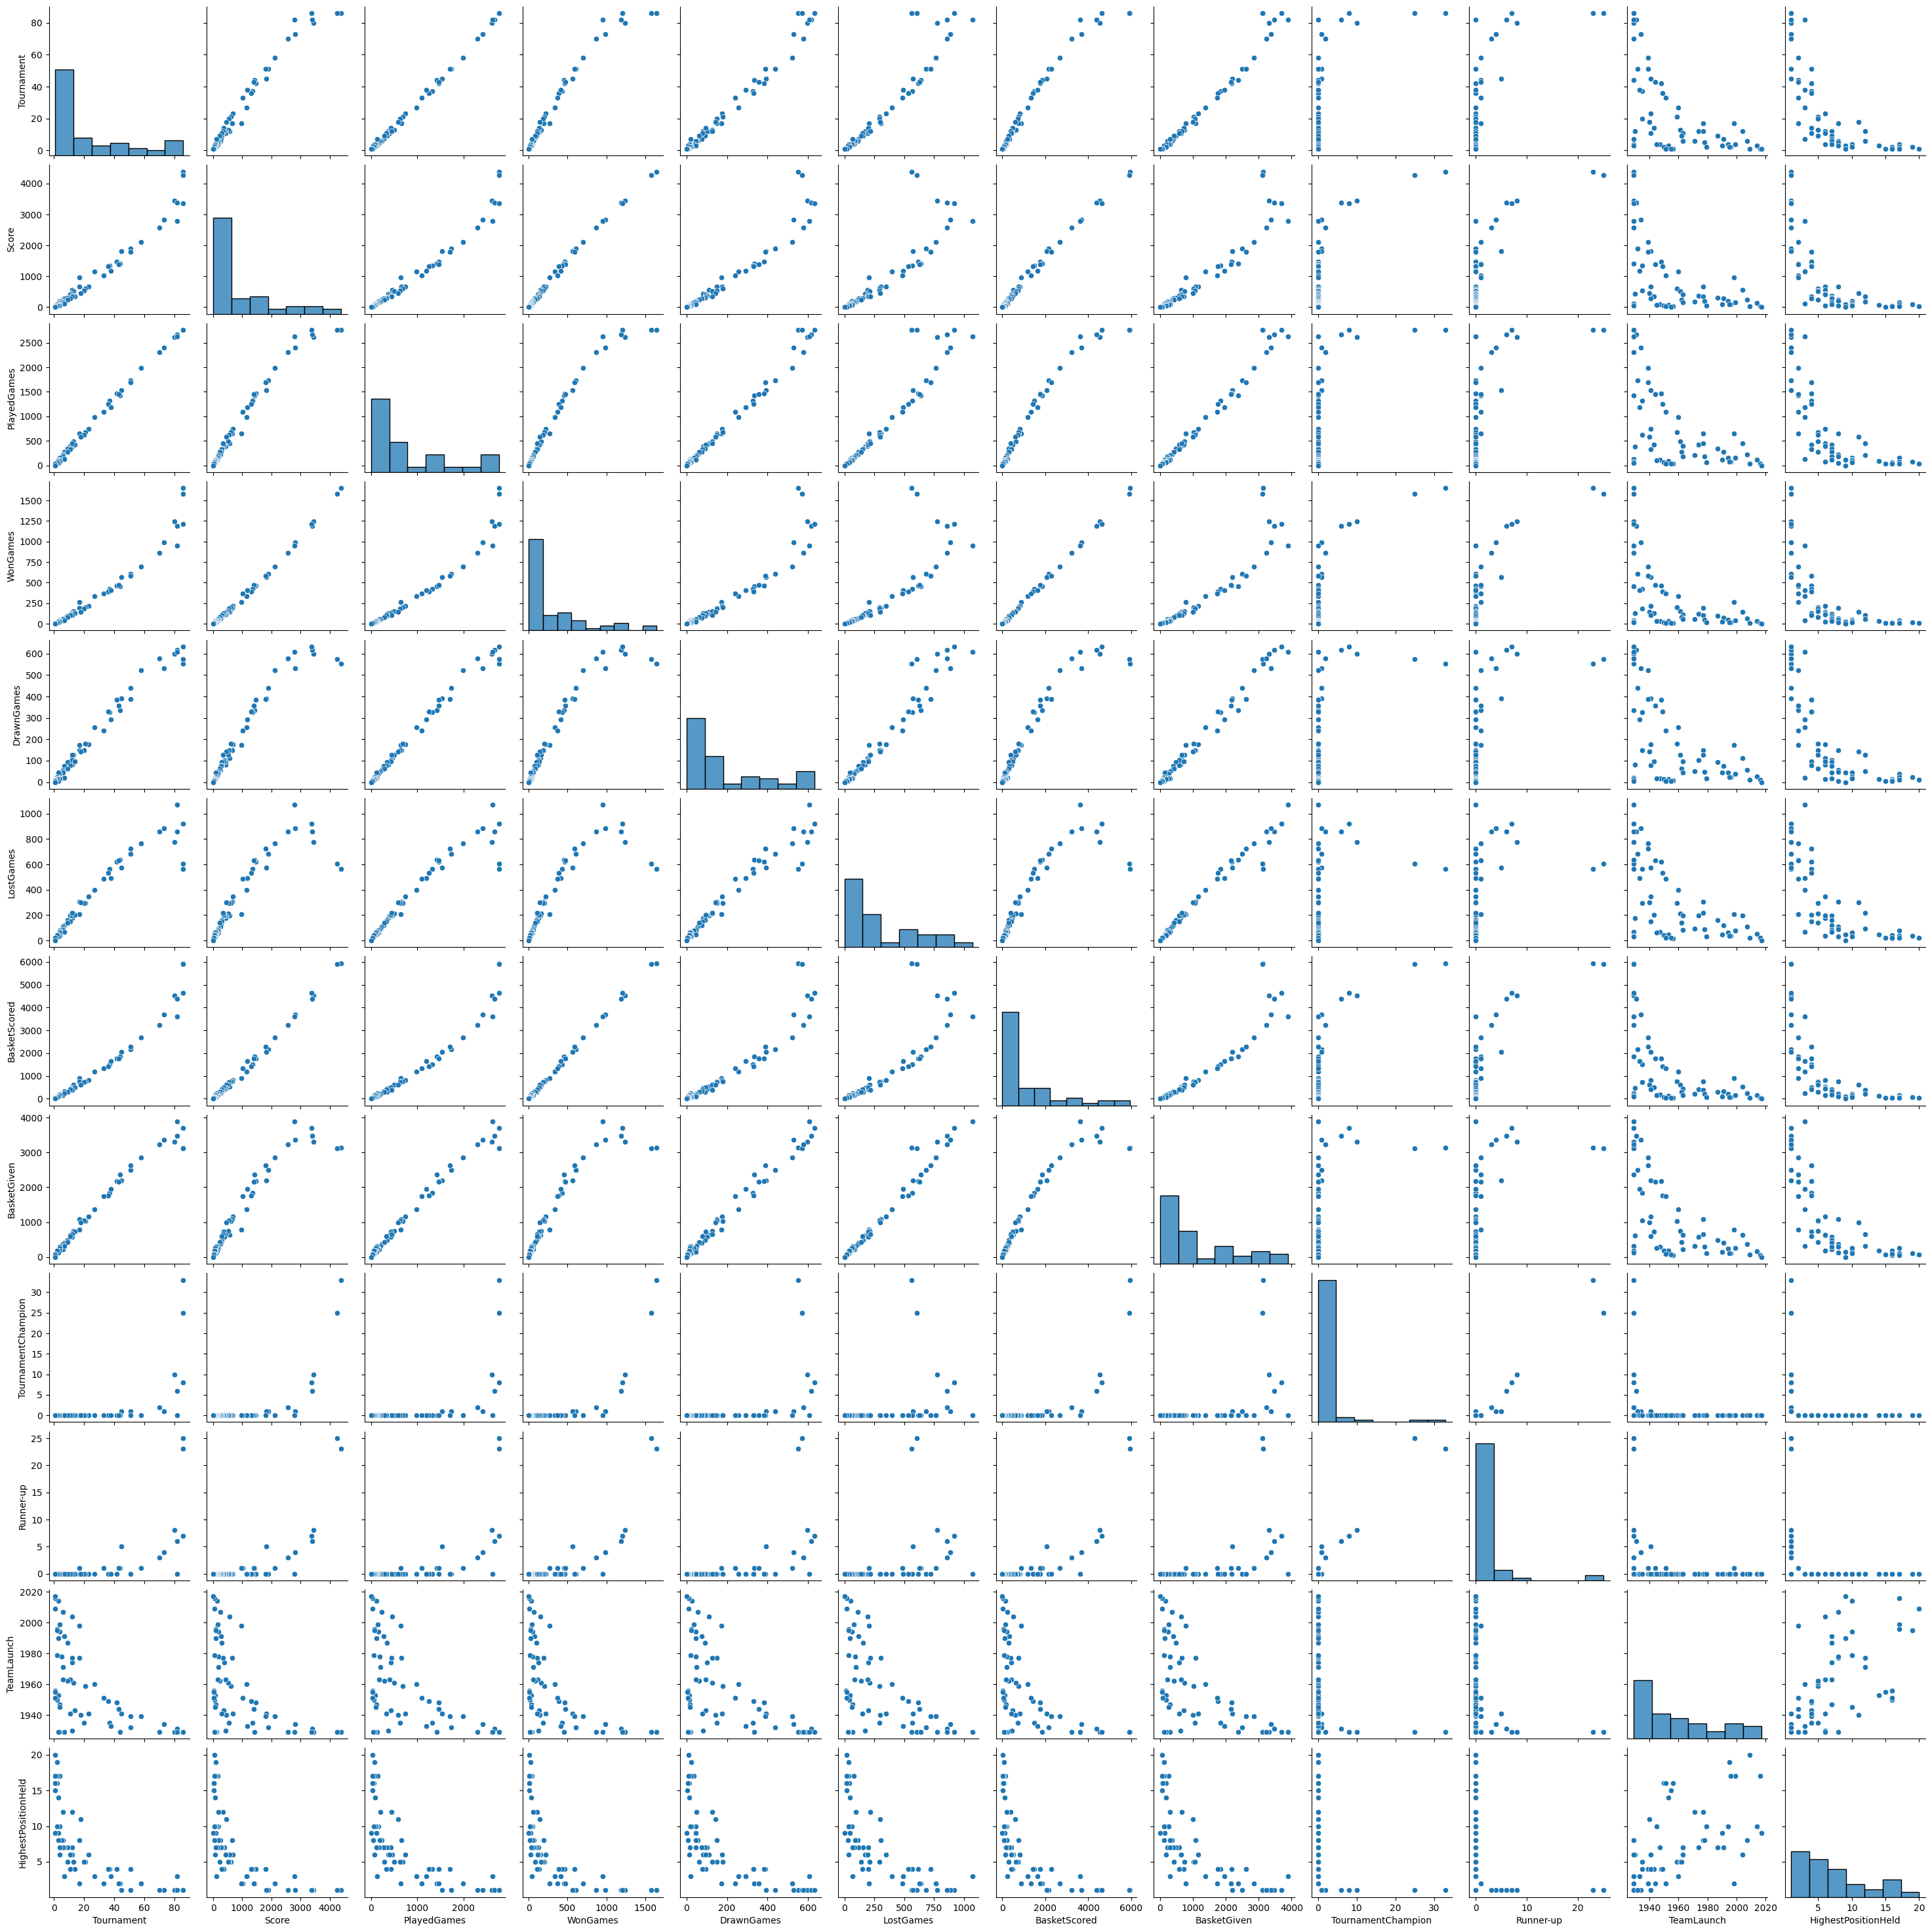

In [28]:
sns.pairplot(data[['Tournament','Score','PlayedGames','WonGames','DrawnGames','LostGames','BasketScored','BasketGiven','TournamentChampion','Runner-up','TeamLaunch','HighestPositionHeld']])

There is very high correlation between BasketScored, WonGames and Score. So, those teams which have a very good attack who have scored more baskets, have had a high overall score.

**If we want to approach a team which is performing really well then Team 21 is one of the youngest teams in the Tournament but has won >40% of its matches. So, in this case Team21 is the team to approach.**

Reasons:


*   One of the youngest teams in the tournament
*   Has win percentage > 40%
*   Other teams like Teams 1 through 6 have been around for a long time and during their early years the number of teams in the tournament might have been less and so may have more tournament victories and wins than the other teams.
